![us_bank_stadium_superbowl_2018](us_bank_stadium_superbowl_2018.png)

Whether or not you like football, the Super Bowl is a spectacle. There's a little something for everyone at your Super Bowl party. Drama in the form of blowouts, comebacks, and controversy for the sports fan. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The half-time shows with the biggest musicians in the world, sometimes riding giant mechanical tigers or leaping from the roof of the stadium. 

The dataset we'll use was scraped and polished from Wikipedia. It is made up of three CSV files, one with game data, one with TV data, and one with halftime musician data for 52 Super Bowls through 2018. 

## The Data

Three datasets have been provided, and summaries and previews of each are presented below.

### 1. **halftime_musicians.csv**

This dataset contains information about the musicians who performed during the halftime shows of various Super Bowl games. The structure is shown below, and it applies to all remaining files.

| Column       | Description                                                                                  |
|--------------|----------------------------------------------------------------------------------------------|
| `'super_bowl'` | The Super Bowl number (e.g., 52 for Super Bowl LII).                                         |
| `'musician'`   | The name of the musician or musical group that performed during the halftime show.           |
| `'num_songs'`  | The number of songs performed by the musician or group during the halftime show.             |

### 2. **super_bowls.csv**

This dataset provides details about each Super Bowl game, including the date, location, participating teams, and scores, including the points difference between the winning and losing team (`'difference_pts'`).

### 3. **tv.csv**

This dataset contains television viewership statistics and advertisement costs related to each Super Bowl.

In [81]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt

In [82]:
# Load the CSV data into DataFrames
super_bowls = pd.read_csv("datasets/super_bowls.csv")
super_bowls.head()
super_bowls.info()

halftime_musicians = pd.read_csv("datasets/halftime_musicians.csv")
halftime_musicians.head()
halftime_musicians.info()

tv = pd.read_csv("datasets/tv.csv")
tv.head()
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

In [83]:
tv = pd.read_csv("datasets/tv.csv")
tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [84]:
halftime_musicians = pd.read_csv("datasets/halftime_musicians.csv")
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


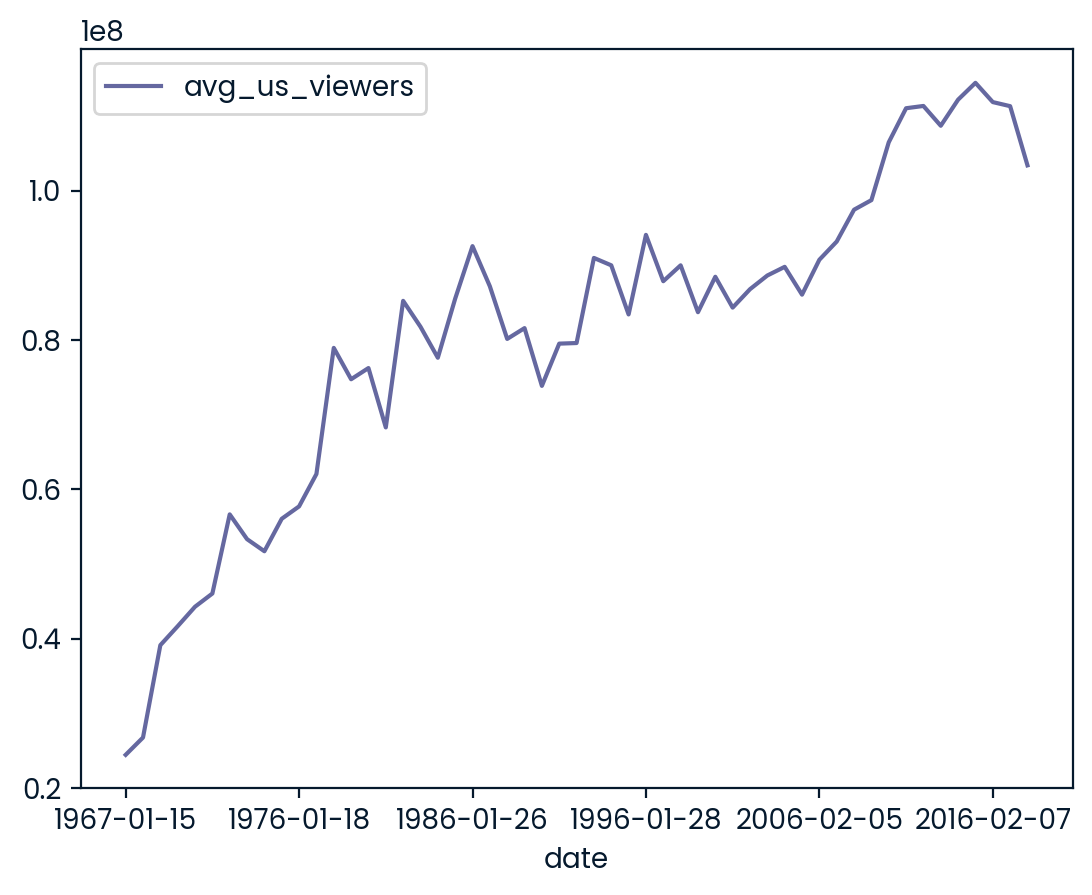

True
1
Justin Timberlake


In [85]:
# Start coding here
# Use as many cells as you need

## TV viewership overtime
# Join super_bowl and tv data and sort by ascending order of date
super_bowls_tv = super_bowls.merge(tv, on = "super_bowl", how = "left")
super_bowls_tv_srt = super_bowls_tv.sort_values(by= "date", ascending = True)
# Plot average US viewers over time
super_bowls_tv_srt.plot(x = "date", y = "avg_us_viewers", kind = "line")
plt.show()
# Find whether average viewership has increased over time
super_bowls_tv_srt_filt = super_bowls_tv_srt[["date", "avg_us_viewers"]].reset_index()
result_1 = (super_bowls_tv_srt_filt.iloc[0,2]) < (super_bowls_tv_srt_filt.iloc[52,2])
print(result_1)
viewership_increased= True

## Number of matches with point difference > 40
# Create plus 40 point difference column
super_bowls["diff_plus_40"] = super_bowls["difference_pts"] > 40
# Count plus 40 point difference matches
super_bowls_filt = super_bowls[super_bowls["diff_plus_40"] == True].count().reset_index()
result_2 = super_bowls_filt.iloc[18, 1]
print(result_2)
difference = int(1)

## Musician who performed most songs in Super Bowl halftime
# Number of songs grouped by musician
halftime_musicians_count = halftime_musicians.groupby("musician")["num_songs"].sum().reset_index()
# Sort in descending order of number of songs
halftime_musicians_srt = halftime_musicians_count.sort_values(by= "num_songs", ascending= False)
result_3 = halftime_musicians_srt.iloc[0, 0]
print(result_3)
most_songs = str("Justin Timberlake")